# FILIAIS DE SUPERMERCADO EM MYANMAR

## PREPARAÇÃO PARA MACHINE LEARNING

### Remoção de colunas sem uso para ML 

In [17]:
df_supermarket.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [18]:
ml_supermarket = df_supermarket.drop(['Invoice ID', 'Date', 'Time'], axis=1)
ml_supermarket.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,4.761905,29.8865,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,4.761905,20.6520,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,Ewallet,735.60,4.761905,36.7800,8.0
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,Credit card,72.52,4.761905,3.6260,7.2
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,Credit card,164.52,4.761905,8.2260,5.9


### Conversão de valores categoricos em valores numericos

##### coluna BRANCH

In [19]:
ml_supermarket['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
ml_supermarket['Branch'] = ml_supermarket['Branch'].map({'A': 1, 'B': 2, 'C': 3})

##### coluna CITY

In [21]:
ml_supermarket['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [22]:
ml_supermarket['City'] = ml_supermarket['City'].map({'Yangon': 1, 'Mandalay': 2, 'Naypyitaw': 3,})

##### coluna CUSTOMER TYPE

In [23]:
ml_supermarket['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [24]:
ml_supermarket['Customer type'] = ml_supermarket['Customer type'].map({'Member': 1, 'Normal': 2})

##### coluna GENDER

In [25]:
ml_supermarket['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
ml_supermarket['Gender'] = ml_supermarket['Gender'].map({'Female': 1, 'Male': 2})

##### coluna PRODUCT LINE

In [27]:
ml_supermarket['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [28]:
ml_supermarket['Product line'] = ml_supermarket['Product line'].map({'Health and beauty': 1, 'Electronic accessories': 2, 
                                                                     'Home and lifestyle': 3, 'Sports and travel': 4,
                                                                     'Food and beverages': 5, 'Fashion accessories': 6})

##### coluna PAYMENT

In [29]:
ml_supermarket['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [30]:
ml_supermarket['Payment'] = ml_supermarket['Payment'].map({'Ewallet': 1, 'Cash': 2, 'Credit card': 3})

### Visualização ML

In [31]:
ml_supermarket.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,1,1,1,1,1,74.69,7,26.1415,548.9715,1,522.83,4.761905,26.1415,9.1
1,3,3,2,1,2,15.28,5,3.8200,80.2200,2,76.40,4.761905,3.8200,9.6
2,1,1,2,2,3,46.33,7,16.2155,340.5255,3,324.31,4.761905,16.2155,7.4
3,1,1,1,2,1,58.22,8,23.2880,489.0480,1,465.76,4.761905,23.2880,8.4
4,1,1,2,2,4,86.31,7,30.2085,634.3785,1,604.17,4.761905,30.2085,5.3


# MACHINE LEARNING UNSUPERVISED K-Means

In [32]:
import numpy as np #para manipular os vetores
from sklearn.cluster import KMeans #para usar o KMeans

##### Dados a serem agrupados

In [33]:
ml_array = np.array(ml_supermarket[['Rating', 'Total']])
ml_array

array([[  9.1   , 548.9715],
       [  9.6   ,  80.22  ],
       [  7.4   , 340.5255],
       ...,
       [  7.7   ,  33.432 ],
       [  4.1   ,  69.111 ],
       [  6.6   , 649.299 ]])

##### Dados plotados sem agrupamento

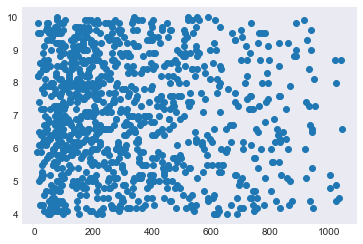

In [34]:
plt.scatter(ml_array[:,1], ml_array[:,0]) #posicionamento dos eixos x e y

plt.grid() #função que desenha a grade no nosso gráfico

##### Dados com o processo de agrupamento pelo K-means

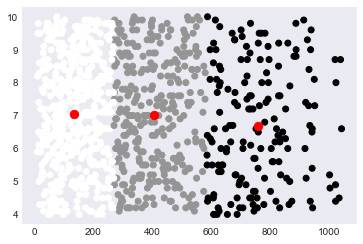

In [36]:
kmeans = KMeans(n_clusters = 3, #numero de clusters
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 500)#numero máximo de iterações

pred_y = kmeans.fit_predict(ml_array)

plt.scatter(ml_array[:,1], ml_array[:,0], c = pred_y) #posicionamento dos eixos x e y

plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1], 
            kmeans.cluster_centers_[:,0], 
            s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()